In [38]:
from keras.datasets import mnist
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load data

In [27]:
# loda data
(trainImage, trainLabel), (testImage, testLabel) = mnist.load_data()
# train image
print(trainImage.shape)
print(testImage.shape)
print()

# train label

print(len(trainLabel))
print(len(testLabel))

(60000, 28, 28)
(10000, 28, 28)

60000
10000


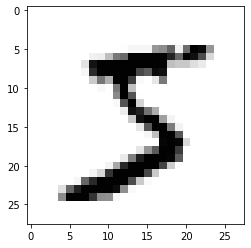

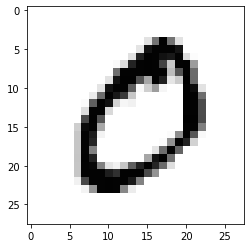

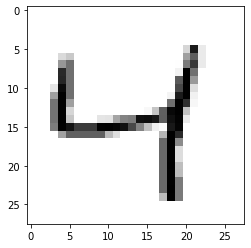

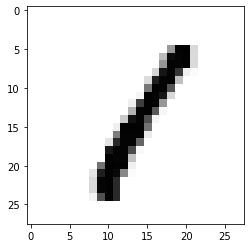

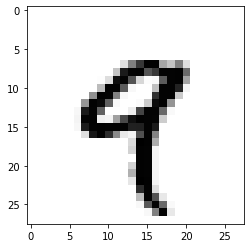

In [28]:
# show some data image
for i in range(5):
    img = trainImage[i]
    plt.imshow(img, cmap='Greys')
    plt.show()

# Network building

In [65]:
nn = models.Sequential()

nn.add(layers.Dense(64, activation='relu', input_shape=(28*28, )))
nn.add(layers.Dense(1024, activation='relu'))



nn.add(layers.Dense(10, activation='softmax'))

nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
# reshape image
fTrainImages = trainImage.reshape((60000, 28*28))
fTestImages = testImage.reshape((10000, 28*28))

# reshape label
fTrainLabel = to_categorical(trainLabel)
fTestLabel = to_categorical(testLabel)


In [67]:
# training
result = nn.fit(fTrainImages, fTrainLabel, epochs=15, batch_size=64, validation_data=(fTrainImages, fTrainLabel))

Epoch 1/15
938/938 [==============================] - 10s 10ms/step - loss: 1.4401 - accuracy: 0.7814 - val_loss: 0.2783 - val_accuracy: 0.9268
Epoch 2/15
938/938 [==============================] - 9s 9ms/step - loss: 0.2399 - accuracy: 0.9399 - val_loss: 0.1895 - val_accuracy: 0.9504
Epoch 3/15
938/938 [==============================] - 9s 10ms/step - loss: 0.1914 - accuracy: 0.9543 - val_loss: 0.1328 - val_accuracy: 0.9656
Epoch 4/15
938/938 [==============================] - 9s 9ms/step - loss: 0.1583 - accuracy: 0.9622 - val_loss: 0.1489 - val_accuracy: 0.9681
Epoch 5/15
938/938 [==============================] - 8s 9ms/step - loss: 0.1550 - accuracy: 0.9659 - val_loss: 0.1392 - val_accuracy: 0.9690
Epoch 6/15
938/938 [==============================] - 8s 9ms/step - loss: 0.1494 - accuracy: 0.9689 - val_loss: 0.1042 - val_accuracy: 0.9720
Epoch 7/15
938/938 [==============================] - 8s 9ms/step - loss: 0.1342 - accuracy: 0.9713 - val_loss: 0.0889 - val_accuracy: 0.9786
Epo

In [77]:
# test
testLoss, testAcc = nn.evaluate(fTestImages, fTestLabel)
print('test loss', testLoss)
print('test accuracy', testAcc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.9577
test loss 0.5024771690368652
test accuracy 0.9577000141143799


# plot

In [76]:
result.history

{'loss': [0.595130443572998,
  0.23321281373500824,
  0.1880960762500763,
  0.16768741607666016,
  0.16472193598747253,
  0.14506889879703522,
  0.14135430753231049,
  0.13839316368103027,
  0.13027404248714447,
  0.1233324334025383,
  0.13351058959960938,
  0.1343659609556198,
  0.13621902465820312,
  0.13022534549236298,
  0.1414794921875],
 'accuracy': [0.8694833517074585,
  0.9429500102996826,
  0.9549999833106995,
  0.9612833261489868,
  0.9657166600227356,
  0.9685333371162415,
  0.970716655254364,
  0.9735999703407288,
  0.9742833375930786,
  0.9750166535377502,
  0.9764166474342346,
  0.9764666557312012,
  0.9761000275611877,
  0.9771333336830139,
  0.9770500063896179],
 'val_loss': [0.2783273458480835,
  0.1895022988319397,
  0.13280515372753143,
  0.1489349752664566,
  0.13915450870990753,
  0.10424571484327316,
  0.08888937532901764,
  0.16291943192481995,
  0.09418987482786179,
  0.08886805176734924,
  0.13629506528377533,
  0.18546037375926971,
  0.10634086281061172,
  0.2

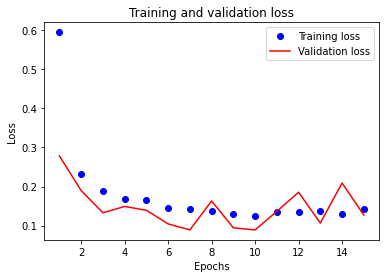

In [78]:
# training loss
historyDict = result.history
lossValue = historyDict['loss']
valLossValue = historyDict['val_loss']
epochs = range(1, len(lossValue) + 1)

plt.plot(epochs, lossValue, 'bo', label='Training loss')
plt.plot(epochs, valLossValue, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

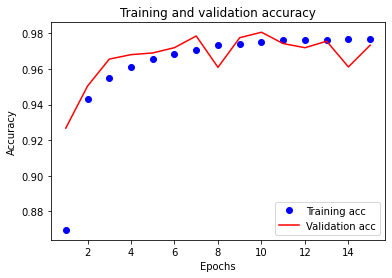

In [84]:
# plot training accuracy
acc = historyDict['accuracy']
valAcc = historyDict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valAcc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
plt.show()